# Important disclaimer
Co-Pilot was used here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv('Stock Market Dataset.csv')
df.head()

Unnamed: 0        Date  Natural_Gas_Price  Natural_Gas_Vol.  \
0           0  02-02-2024              2.079               NaN   
1           1  01-02-2024              2.050          161340.0   
2           2  31-01-2024              2.100          142860.0   
3           3  30-01-2024              2.077          139750.0   
4           4  29-01-2024              2.490            3590.0   

   Crude_oil_Price  Crude_oil_Vol.  Copper_Price  Copper_Vol. Bitcoin_Price  \
0            72.28             NaN        3.8215          NaN     43,194.70   
1            73.82        577940.0        3.8535          NaN     43,081.40   
2            75.85        344490.0        3.9060          NaN     42,580.50   
3            77.82        347240.0        3.9110          NaN     42,946.20   
4            76.78        331930.0        3.8790          NaN     43,299.80   

   Bitcoin_Vol.  ... Berkshire_Price  Berkshire_Vol. Netflix_Price  \
0       42650.0  ...        5,89,498         10580.0        564.64   
1       47690.0  ...        5,81,600          9780.0        567.51   
2       56480.0  ...        5,78,020          9720.0        564.11   
3       55130.0  ...        5,84,680          9750.0        562.85   
4       45230.0  ...        5,78,800         13850.0        575.79   

   Netflix_Vol. Amazon_Price  Amazon_Vol.  Meta_Price   Meta_Vol.  Gold_Price  \
0     4030000.0       171.81  117220000.0      474.99  84710000.0    2,053.70   
1     3150000.0       159.28   66360000.0      394.78  25140000.0    2,071.10   
2     4830000.0       155.20   49690000.0      390.14  20010000.0    2,067.40   
3     6120000.0       159.00   42290000.0      400.06  18610000.0    2,050.90   
4     6880000.0       161.26   42840000.0      401.02  17790000.0    2,034.90   

   Gold_Vol.  
0        NaN  
1   260920.0  
2   238370.0  
3   214590.0  
4     1780.0  

[5 rows x 39 columns]

# Variable Identification

In [3]:
# drop the unnamed column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# variable identification
# print the columns that are object data types
print(df.dtypes[df.dtypes == 'object'])

#change the object data types to float
df['Bitcoin_Price'] = df['Bitcoin_Price'].str.replace(',', '').astype(float)
df['Platinum_Price'] = df['Platinum_Price'].str.replace(',', '').astype(float)
#df['Ethereum_Price'] = df['Ethereum_Price'].str.replace(',', '').astype(float)
df['Gold_Price'] = df['Gold_Price'].str.replace(',', '').astype(float)
df['Ethereum_Price'] = df['Ethereum_Price'].str.replace(',', '').astype(float)
df['S&P_500_Price'] = df['S&P_500_Price'].str.replace(',', '').astype(float)
df['Nasdaq_100_Price'] = df['Nasdaq_100_Price'].str.replace(',', '').astype(float)
df['Berkshire_Price'] = df['Berkshire_Price'].str.replace(',', '').astype(float)

df.dtypes


Date                object
Bitcoin_Price       object
Platinum_Price      object
Ethereum_Price      object
S&P_500_Price       object
Nasdaq_100_Price    object
Berkshire_Price     object
Gold_Price          object
dtype: object


Date                  object
Natural_Gas_Price    float64
Natural_Gas_Vol.     float64
Crude_oil_Price      float64
Crude_oil_Vol.       float64
Copper_Price         float64
Copper_Vol.          float64
Bitcoin_Price        float64
Bitcoin_Vol.         float64
Platinum_Price       float64
Platinum_Vol.        float64
Ethereum_Price       float64
Ethereum_Vol.        float64
S&P_500_Price        float64
Nasdaq_100_Price     float64
Nasdaq_100_Vol.      float64
Apple_Price          float64
Apple_Vol.           float64
Tesla_Price          float64
Tesla_Vol.           float64
Microsoft_Price      float64
Microsoft_Vol.       float64
Silver_Price         float64
Silver_Vol.          float64
Google_Price         float64
Google_Vol.          float64
Nvidia_Price         float64
Nvidia_Vol.          float64
Berkshire_Price      float64
Berkshire_Vol.       float64
Netflix_Price        float64
Netflix_Vol.         float64
Amazon_Price         float64
Amazon_Vol.          float64
Meta_Price    

# Univariate analysis


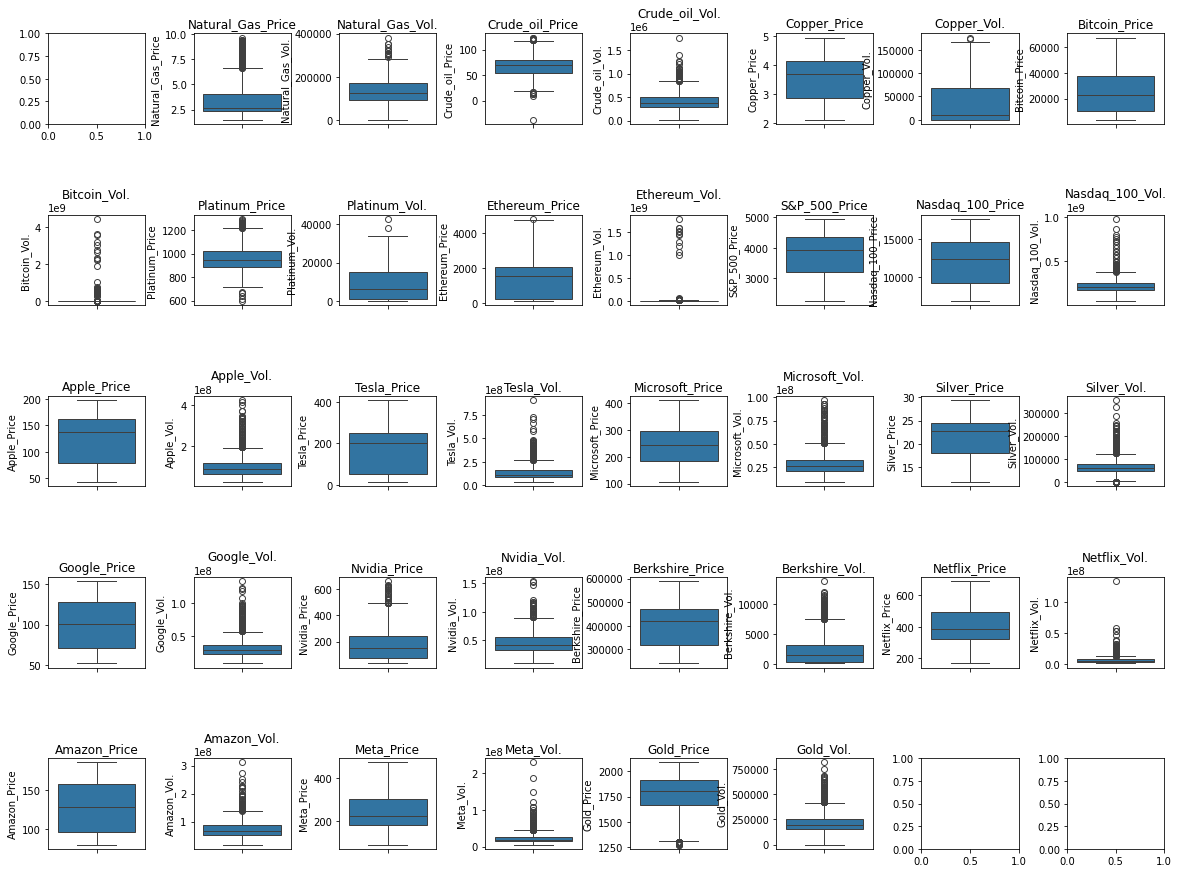

In [4]:
column_stats = df.describe().loc[['mean', 'std', 'min', 'max']]

column_stats

#make separate boxplots for each column
fig, axs = plt.subplots(5, 8, figsize=(20, 15))
fig.subplots_adjust(hspace = 1, wspace=.5)
axs = axs.ravel()
for i, column in enumerate(df.columns):
    if column != 'Date':
        sns.boxplot(y=df[column], ax=axs[i])
        axs[i].set_title(column)
plt.show()





In [5]:
#make a list of the columns containing Price
price_columns = [col for col in df.columns if 'Price' in col]

#show an ordered list of the price columns based on least variance
variances = (df[price_columns].std()/df[price_columns].mean()).sort_values()*100



Now that we know the volatility of the columns, we should find the percentage growth of items over the 4 years to give some context to the variance values

In [6]:
#make a list of the columns containing Price
price_columns = [col for col in df.columns if 'Price' in col]

#show an ordered list of the price columns based on most growth
#math not mathing, brain not braining

prices = ((df[price_columns].iloc[0]-df[price_columns].iloc[-1])/df[price_columns].iloc[-1]).sort_values()*100


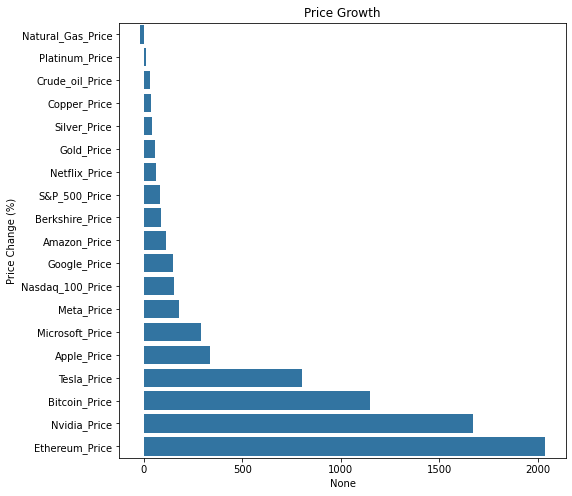

In [50]:
#make a bar chart of the change in prices

plt.figure(figsize=(8,8))
sns.barplot(x=prices, y=prices.index)
plt.ylabel('Price Change (%)')
plt.title('Price Growth')
plt.show()


In [7]:
#combine values from the two previous cells
variances_prices = pd.concat([variances, prices], axis=1)
variances_prices.columns = ['variance', 'price_change']
variances_prices

#find the pair with the highest price change and lowest variance

variance  price_change
Platinum_Price     11.263028      9.617021
Gold_Price         11.553746     55.665883
S&P_500_Price      16.669333     81.976021
Silver_Price       17.876198     43.497419
Copper_Price       19.842669     36.604111
Berkshire_Price    21.364250     88.941667
Amazon_Price       23.941449    110.371005
Nasdaq_100_Price   23.984327    153.488957
Netflix_Price      28.403716     60.710423
Meta_Price         29.623318    180.644018
Google_Price       29.865201    149.483091
Crude_oil_Price    30.284684     32.478006
Microsoft_Price    30.438491    288.897295
Apple_Price        36.724851    334.127540
Natural_Gas_Price  52.151342    -21.842105
Tesla_Price        61.459659    800.814957
Bitcoin_Price      63.501587   1147.392284
Nvidia_Price       71.911438   1673.726542
Ethereum_Price     80.278231   2040.203892

What I learned is that the volume graphs look funny which the stock price graphs are more sane, ie have less outliers and are more modiocristan

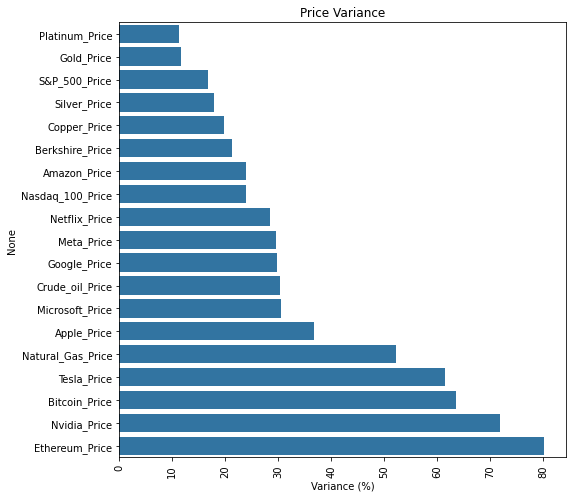

In [41]:
#make a bar plot for the variances

price_list = [col for col in df.columns if 'Price' in col]

plt.figure(figsize=(8,8))
sns.barplot(x=variances, y=variances.index)
plt.xlabel('Variance (%)')
plt.xticks(rotation=90)
plt.title('Price Variance')
plt.show()


# Bivariate analysis

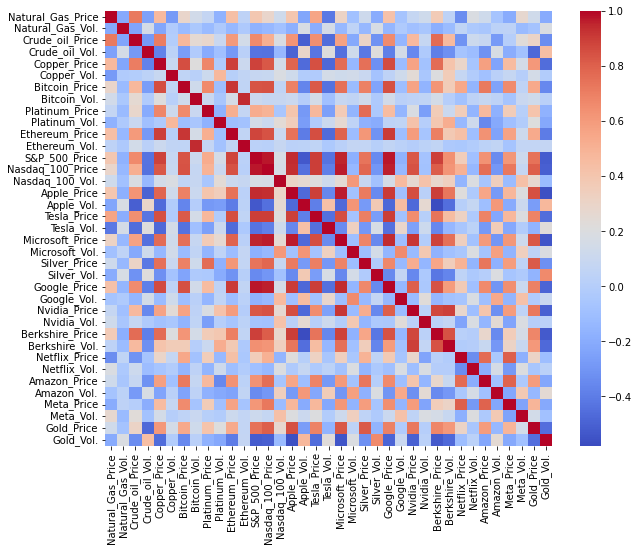

Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
Natural_Gas_Price           1.000000         -0.208991         0.716886   
Natural_Gas_Vol.           -0.208991          1.000000        -0.237081   
Crude_oil_Price             0.716886         -0.237081         1.000000   
Crude_oil_Vol.             -0.247646          0.155983        -0.285883   
Copper_Price                0.464759         -0.228252         0.708823   
Copper_Vol.                -0.281545         -0.022949        -0.011311   
Bitcoin_Price               0.288574         -0.123655         0.475090   
Bitcoin_Vol.                0.141344         -0.046180         0.257041   
Platinum_Price              0.072024         -0.125231         0.283429   
Platinum_Vol.              -0.171531         -0.036139         0.096158   
Ethereum_Price              0.434061         -0.137580         0.600478   
Ethereum_Vol.               0.039430         -0.033422         0.145125   
S&P_500_Price               0.394936         -0.169623         0.664019   
Nasdaq_100_Price            0.287696         -0.138075         0.513566   
Nasdaq_100_Vol.             0.127726         -0.089422         0.180922   
Apple_Price                 0.400177         -0.181892         0.628519   
Apple_Vol.                 -0.232286          0.178738        -0.505849   
Tesla_Price                 0.556997         -0.193939         0.644807   
Tesla_Vol.                 -0.415713          0.157879        -0.457979   
Microsoft_Price             0.311807         -0.140556         0.572795   
Microsoft_Vol.             -0.091324          0.048798        -0.210212   
Silver_Price                0.118991         -0.138882         0.304039   
Silver_Vol.                -0.202657          0.173293        -0.318291   
Google_Price                0.420304         -0.150679         0.658132   
Google_Vol.                -0.067424         -0.026652        -0.148250   
Nvidia_Price                0.076696         -0.096069         0.468824   
Nvidia_Vol.                 0.127899         -0.060213         0.076902   
Berkshire_Price             0.369141         -0.186118         0.762903   
Berkshire_Vol.              0.040778         -0.119089         0.460262   
Netflix_Price              -0.333706          0.056301        -0.309890   
Netflix_Vol.                0.192001         -0.040441         0.114767   
Amazon_Price                0.129552         -0.058512         0.082066   
Amazon_Vol.                -0.072860          0.036754        -0.278076   
Meta_Price                 -0.196996          0.041592         0.001931   
Meta_Vol.                   0.266667         -0.125349         0.231496   
Gold_Price                  0.135257         -0.077761         0.308522   
Gold_Vol.                  -0.205657          0.189456        -0.337288   

                   Crude_oil_Vol.  Copper_Price  Copper_Vol.  Bitcoin_Price  \
Natural_Gas_Price       -0.247646      0.464759    -0.281545       0.288574   
Natural_Gas_Vol.         0.155983     -0.228252    -0.022949      -0.123655   
Crude_oil_Price         -0.285883      0.708823    -0.011311       0.475090   
Crude_oil_Vol.           1.000000     -0.376705     0.035555      -0.269952   
Copper_Price            -0.376705      1.000000     0.089932       0.853973   
Copper_Vol.              0.035555      0.089932     1.000000       0.052276   
Bitcoin_Price           -0.269952      0.853973     0.052276       1.000000   
Bitcoin_Vol.            -0.020243      0.211113     0.014323       0.127670   
Platinum_Price          -0.208012      0.676441     0.113864       0.660796   
Platinum_Vol.           -0.092475     -0.029064     0.474969      -0.109305   
Ethereum_Price          -0.285774      0.894603     0.009164       0.918857   
Ethereum_Vol.            0.024658      0.108641     0.059029       0.050803   
S&P_500_Price           -0.431982      0.887495     0.086512       0.836900   
Nasdaq_100_Price        -0.440680      0.826520     0.093099  

In [8]:
# make a correlation matrix excluding the date column
modified_df = df.drop('Date', axis=1)
correlation_matrix = modified_df.corr()
correlation_matrix

# make a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

correlation_matrix




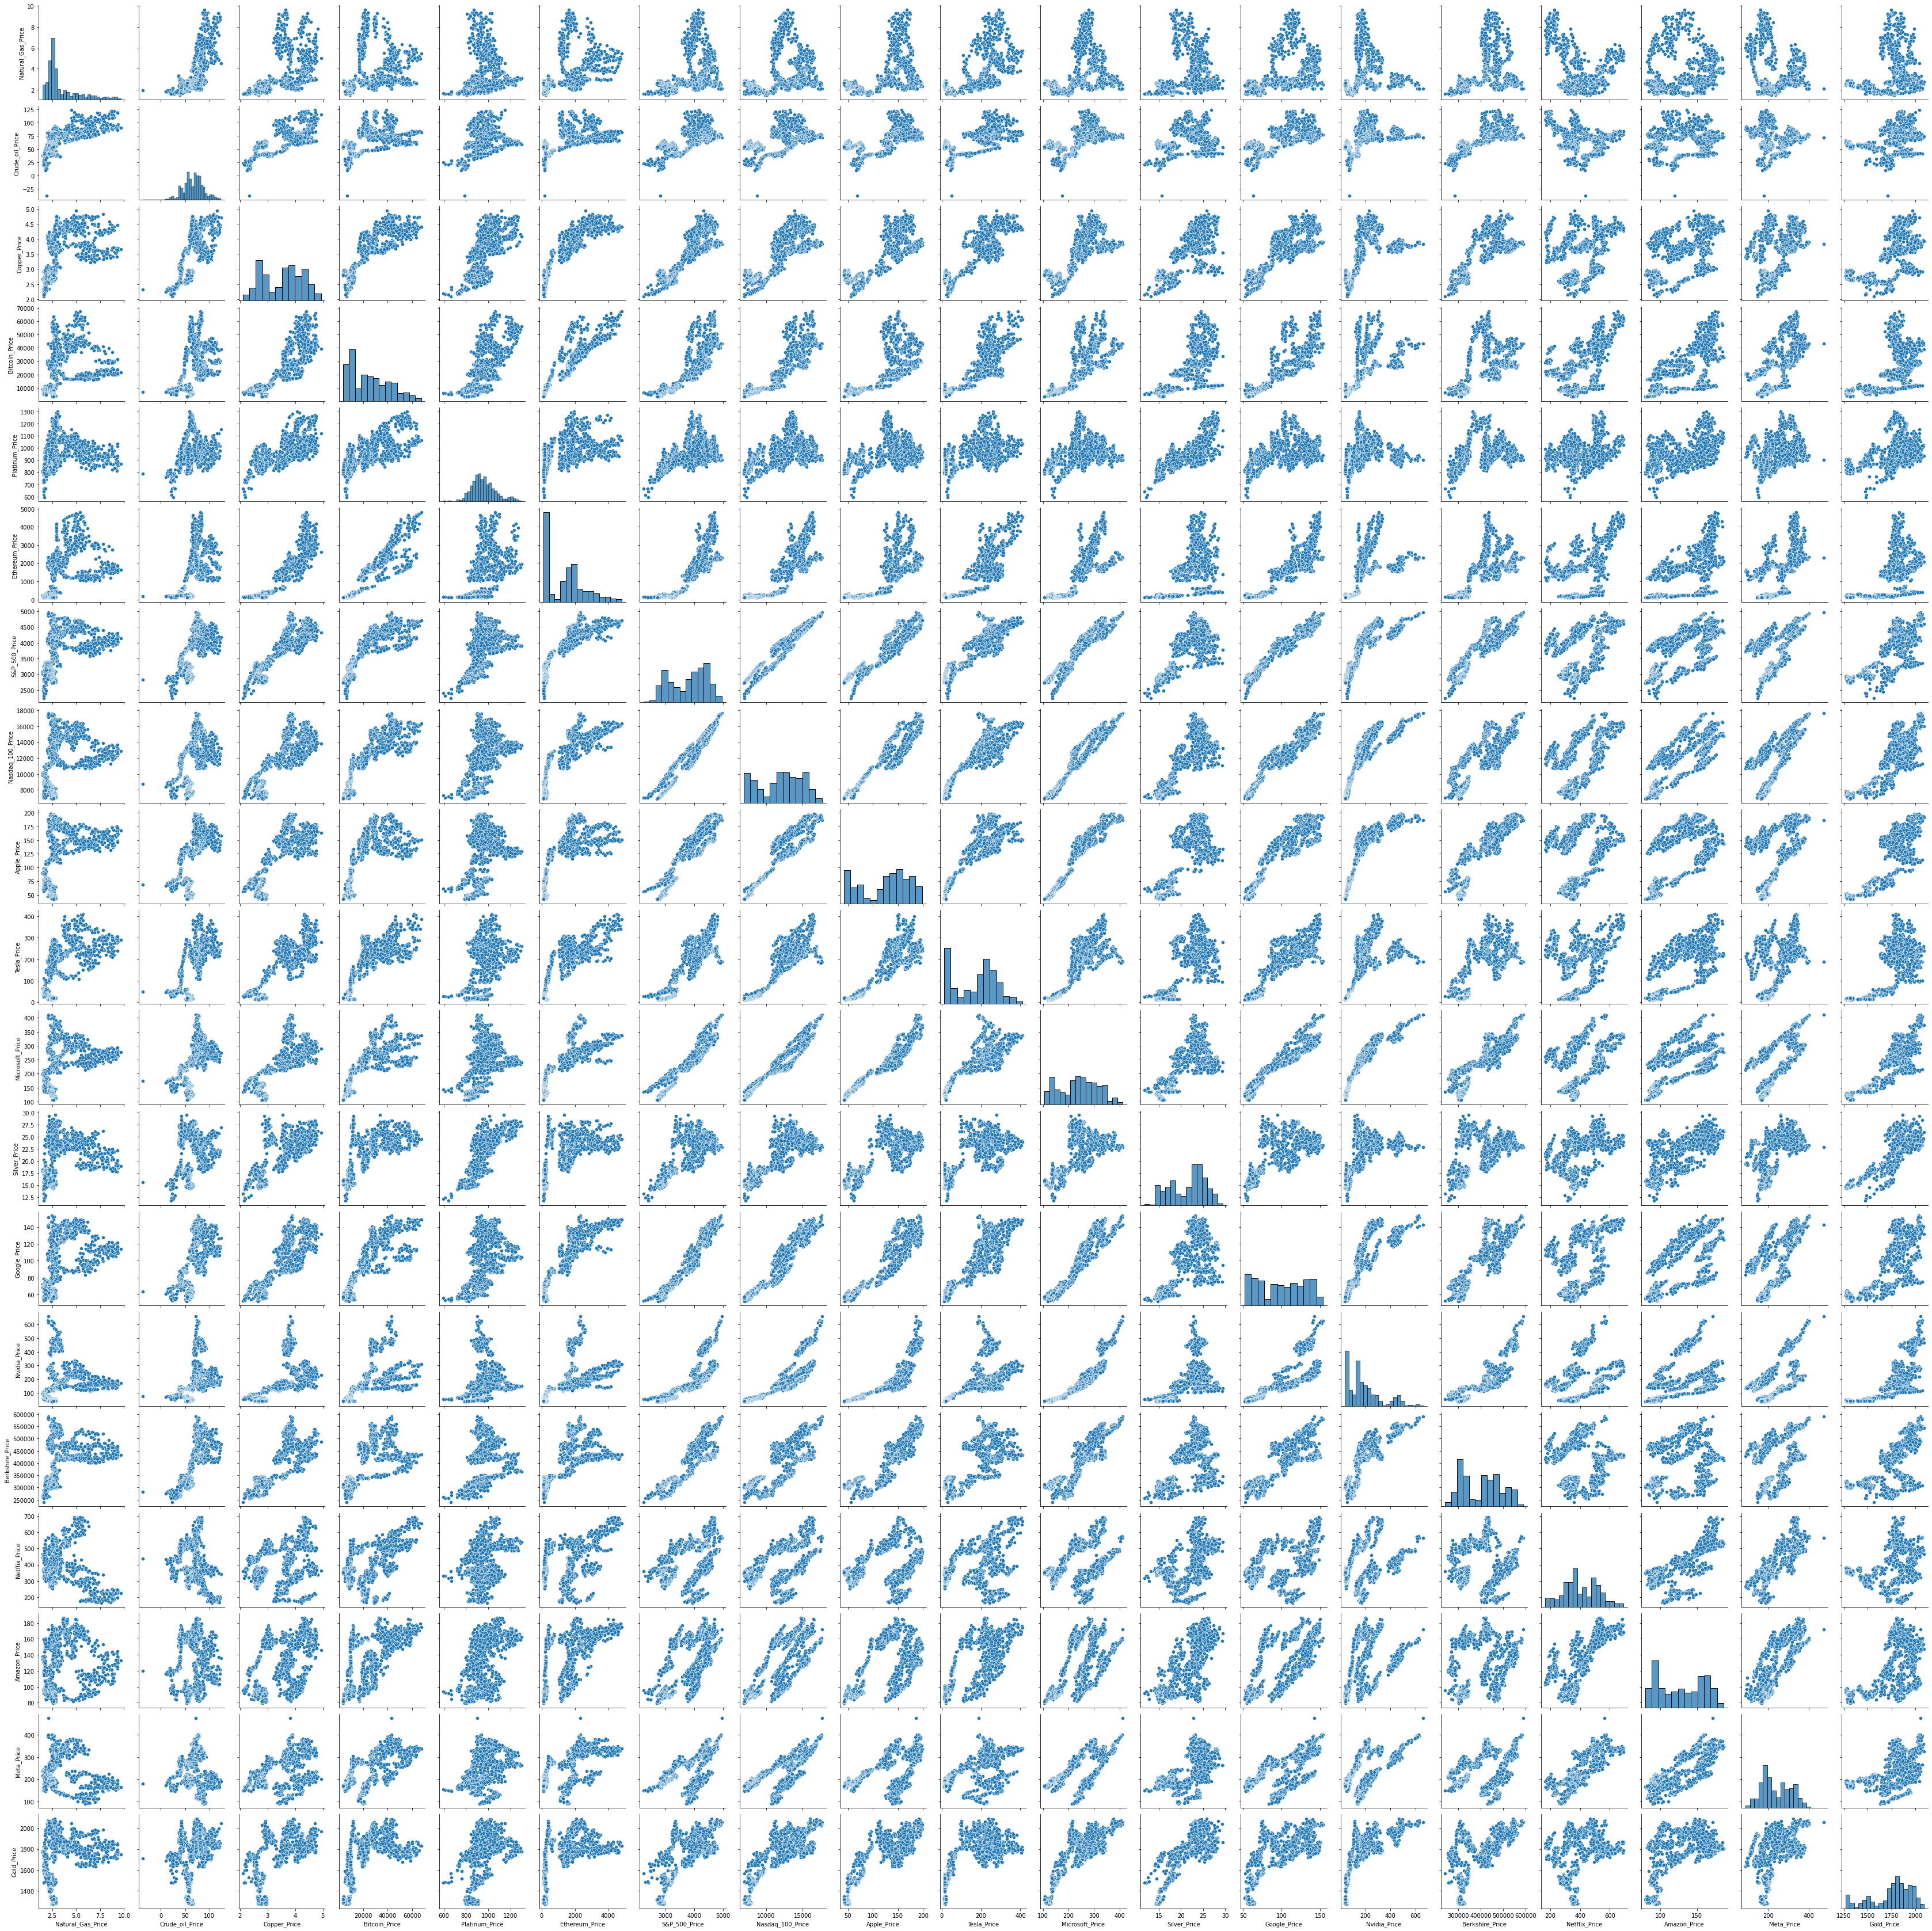

In [9]:
# create a list of the columns containing the word 'Price'
price_list = [col for col in df.columns if 'Price' in col]
price_list_part_1 = price_list[:9]
price_list_part_2 = price_list[9:]


# make a scatterplot matrix
sns.pairplot(df[price_list])
plt.show()



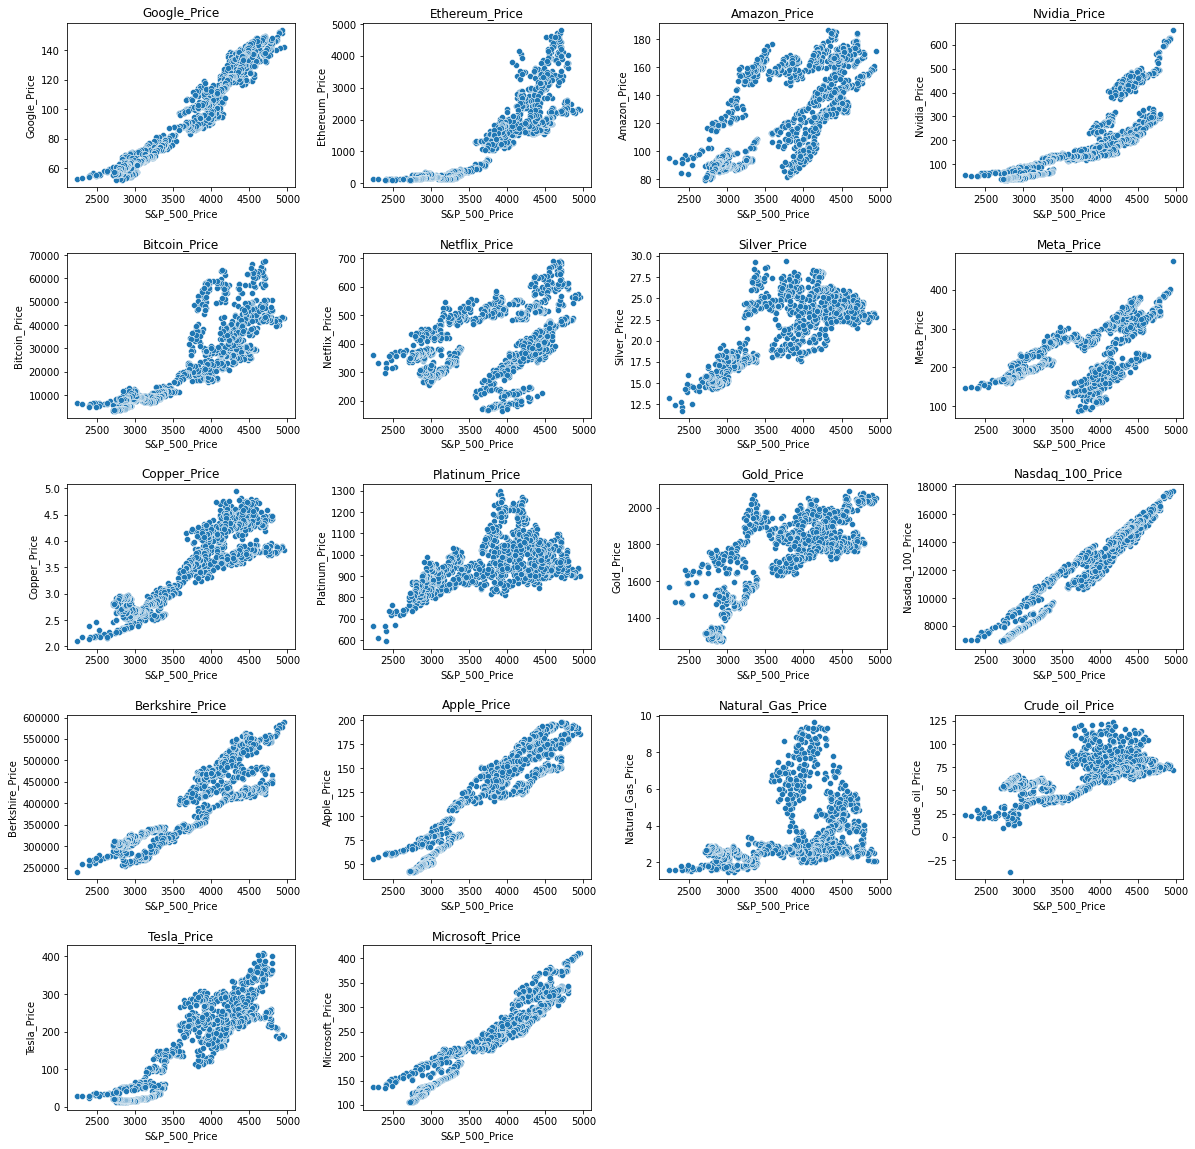

In [46]:
price_list = list(set(price_list) - set(['S&P_500_Price']))

plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust the hspace and wspace values as per your requirement
for i, column in enumerate(price_list):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(x='S&P_500_Price', y=column, data=df)  # Set linestyle to 'None'
    plt.title(column)
plt.show()

price_list = price_list + ['S&P_500_Price']

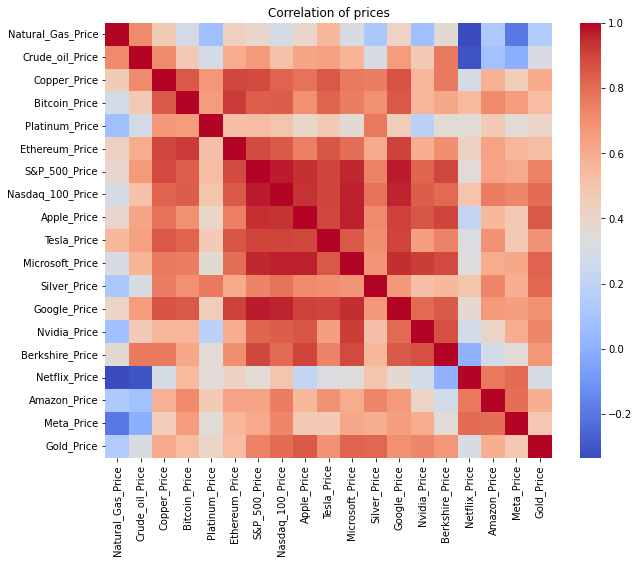

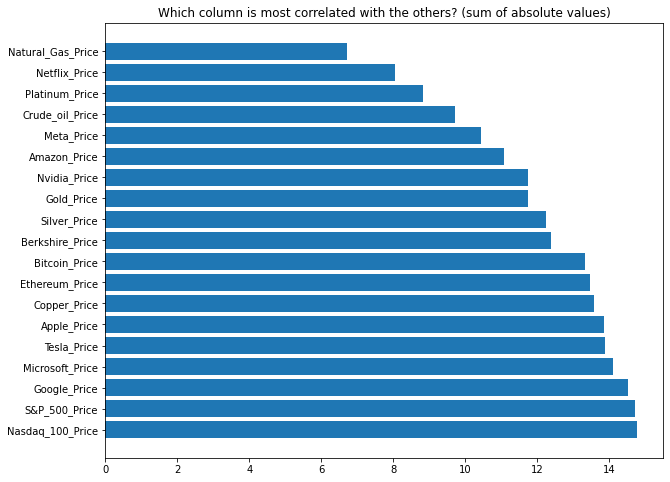

In [26]:
#also make a heatmap of the price_list
plt.figure(figsize=(10, 8))
plt.title("Correlation of prices")
sns.heatmap(df[price_list].corr(), cmap='coolwarm')
plt.show()

#what is the most correlated column with all the price columns
correlations = df[price_list].corr().abs().sum()
correlations = correlations.sort_values(ascending=False)
correlations

#make a bar chart of the correlations

#switch the x and y axis
plt.figure(figsize=(10, 8))
plt.title("Which column is most correlated with the others? (sum of absolute values)")
plt.barh(correlations.index, correlations)
plt.show()



# Time series bivariate analysis

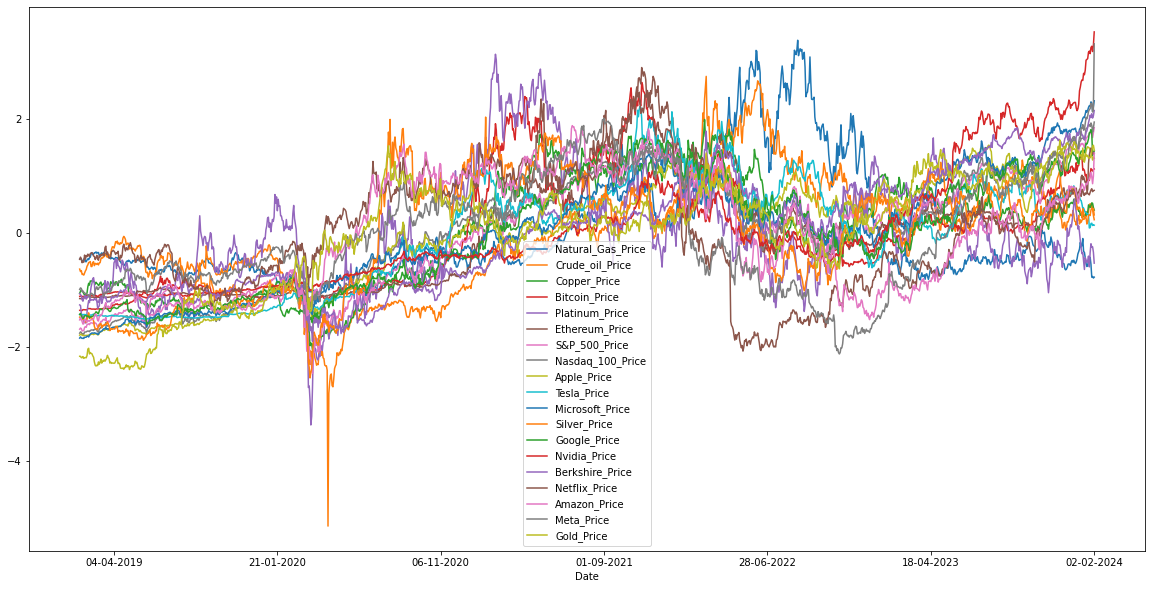

In [11]:
#normalize the data and plot a time series for the price columns
price_list = [col for col in df.columns if 'Price' in col]
price_df = df[price_list]
price_df = (price_df - price_df.mean()) / price_df.std()
price_df['Date'] = df['Date']
price_df = price_df.set_index('Date')
ax = price_df.plot(figsize=(20, 10))
ax.invert_xaxis()
plt.show()


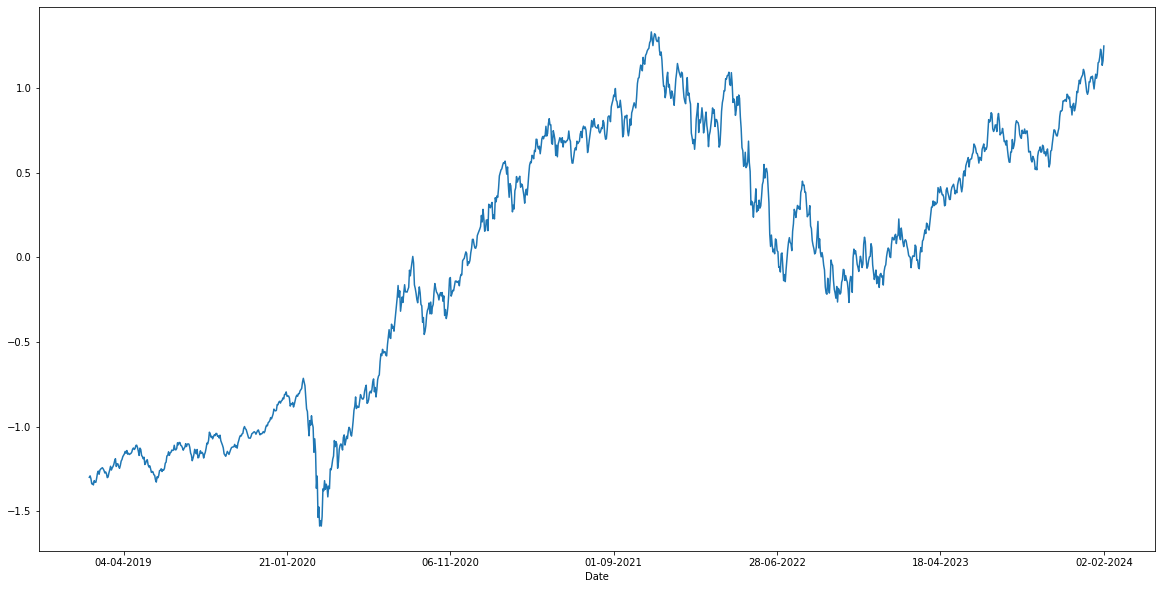

In [12]:
#combine all the standardised price columns into one column and graph a time series
price_df['Combined'] = price_df.mean(axis=1)
ax = price_df['Combined'].plot(figsize=(20, 10))
ax.invert_xaxis()
plt.show()

<ipython-input-13-a335166b0c9d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['Date'] = df['Date']


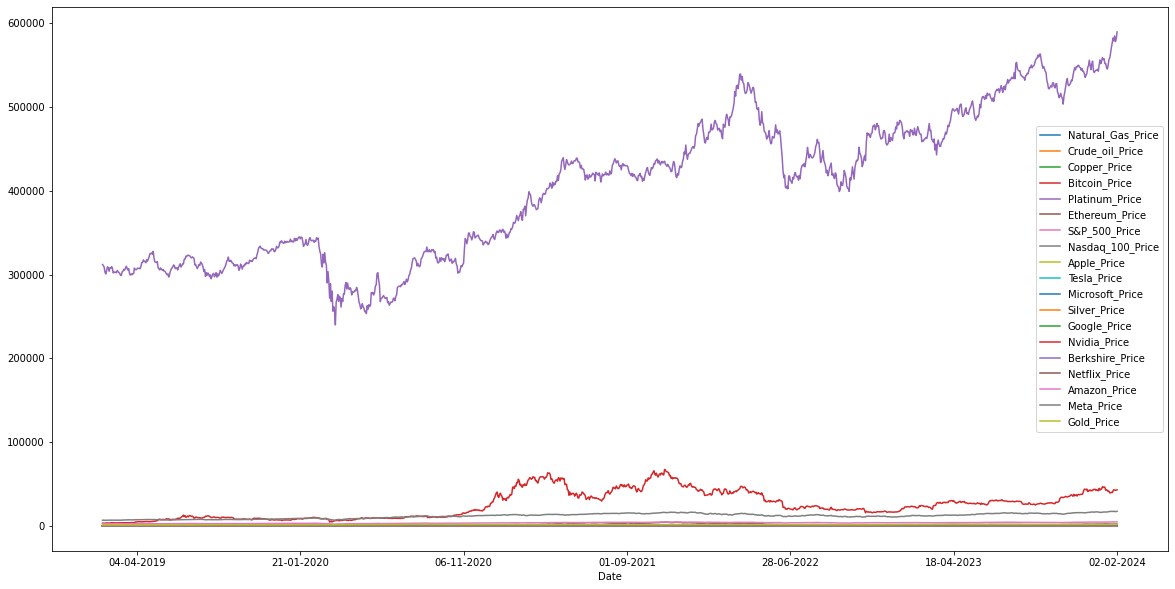

In [13]:
#make a list of the columns containing price and graph a time series of that column
price_list = [col for col in df.columns if 'Price' in col]
price_df = df[price_list]
price_df['Date'] = df['Date']
price_df = price_df.set_index('Date')
ax = price_df.plot(figsize=(20, 10))
ax.invert_xaxis()
plt.show()


In [14]:
#find the least volatile price column
price_std = price_df.std().sort_values()
price_std

Copper_Price             0.702819
Natural_Gas_Price        1.822540
Silver_Price             3.859288
Crude_oil_Price         20.465500
Google_Price            29.766893
Amazon_Price            30.808631
Apple_Price             46.114122
Meta_Price              71.015427
Microsoft_Price         73.429838
Tesla_Price            106.688094
Platinum_Price         108.012849
Netflix_Price          114.989473
Nvidia_Price           134.679941
Gold_Price             203.258901
S&P_500_Price          632.321579
Ethereum_Price        1160.674814
Nasdaq_100_Price      2887.069742
Bitcoin_Price        16029.009055
Berkshire_Price      86369.903899
dtype: float64

# Missing value analysis

In [15]:
# display the percentage of missing values in each column

missing_values = df.isnull().mean() * 100
missing_values

Date                  0.000000
Natural_Gas_Price     0.000000
Natural_Gas_Vol.      0.321802
Crude_oil_Price       0.000000
Crude_oil_Vol.        1.850362
Copper_Price          0.000000
Copper_Vol.           2.976669
Bitcoin_Price         0.000000
Bitcoin_Vol.          0.000000
Platinum_Price        0.000000
Platinum_Vol.        48.833467
Ethereum_Price        0.000000
Ethereum_Vol.         0.000000
S&P_500_Price         0.000000
Nasdaq_100_Price      0.000000
Nasdaq_100_Vol.       0.080451
Apple_Price           0.000000
Apple_Vol.            0.000000
Tesla_Price           0.000000
Tesla_Vol.            0.000000
Microsoft_Price       0.000000
Microsoft_Vol.        0.000000
Silver_Price          0.000000
Silver_Vol.           3.781175
Google_Price          0.000000
Google_Vol.           0.000000
Nvidia_Price          0.000000
Nvidia_Vol.           0.000000
Berkshire_Price       0.000000
Berkshire_Vol.        0.000000
Netflix_Price         0.000000
Netflix_Vol.          0.000000
Amazon_P

# Outlier detection and analysis

In [16]:
# find the percentage of outliers out of each column using the 1.5*IQR rule
modified_df = df.drop('Date', axis=1)

outliers = (modified_df < (column_stats.loc['mean'] - 1.5 * column_stats.loc['std'])) | (modified_df > (column_stats.loc['mean'] + 1.5 * column_stats.loc['std']))

outliers = outliers.mean() * 100
outliers

Natural_Gas_Price    11.423974
Natural_Gas_Vol.     13.596138
Crude_oil_Price      12.067578
Crude_oil_Vol.       13.274336
Copper_Price          8.688656
Copper_Vol.           7.160097
Bitcoin_Price         8.527755
Bitcoin_Vol.          2.252615
Platinum_Price       11.826227
Platinum_Vol.         5.148833
Ethereum_Price        9.010459
Ethereum_Vol.         0.884956
S&P_500_Price         9.654063
Nasdaq_100_Price     13.435237
Nasdaq_100_Vol.       5.309735
Apple_Price          14.722446
Apple_Vol.            7.160097
Tesla_Price           6.194690
Tesla_Vol.            7.481899
Microsoft_Price      12.067578
Microsoft_Vol.        7.481899
Silver_Price         15.366050
Silver_Vol.          11.745776
Google_Price          5.711987
Google_Vol.           6.999195
Nvidia_Price         13.515688
Nvidia_Vol.           8.769107
Berkshire_Price      11.826227
Berkshire_Vol.       13.274336
Netflix_Price        14.400644
Netflix_Vol.          4.907482
Amazon_Price          4.666130
Amazon_V